# Importing Python libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import yfinance as yf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from datetime import datetime
from keras.layers import Activation
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import VotingRegressor
from prettytable import PrettyTable


import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> XPEV Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# ------------------------------------------------------------------------------------------------------

# Loading dataset

In [2]:
data = yf.Ticker("XPEV")
data = data.history(period='10y')

# ------------------------------------------------------------------------------------------------------

# Data analysis

# ------------------------------------------------------------------------------------------------------

### Five top records of data

In [3]:
data.head()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2020-08-27  23.100000  25.000000  21.200001  21.219999  82219700          0   
2020-08-28  23.980000  24.400000  22.020000  22.790001  44847300          0   
2020-08-31  22.690001  22.790001  20.330000  20.500000  20816000          0   
2020-09-01  20.980000  21.790001  20.100000  21.610001  15291400          0   
2020-09-02  21.990000  22.000000  20.379999  21.090000   9090100          0   

            Stock Splits  
Date                      
2020-08-27             0  
2020-08-28             0  
2020-08-31             0  
2020-09-01             0  
2020-09-02             0

### Five last records of data

In [4]:
data.tail()

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2021-07-14  38.889999  39.505001  37.279999  37.770000  11170200          0   
2021-07-15  37.490002  39.299999  36.919998  38.509998  11017100          0   
2021-07-16  38.930000  39.549999  38.380001  39.029999  11302700          0   
2021-07-19  38.180000  39.900002  37.209999  39.720001  10564000          0   
2021-07-20  39.939999  40.279999  39.110001  39.875000   5568558          0   

            Stock Splits  
Date                      
2021-07-14             0  
2021-07-15             0  
2021-07-16             0  
2021-07-19             0  
2021-07-20             0

### Coloumns/features in data

In [5]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Length of data

In [6]:
print('lenght of data is', len(data))

lenght of data is 225


### Shape of data

In [7]:
data.shape

(225, 7)

### Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2020-08-27 to 2021-07-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          225 non-null    float64
 1   High          225 non-null    float64
 2   Low           225 non-null    float64
 3   Close         225 non-null    float64
 4   Volume        225 non-null    int64  
 5   Dividends     225 non-null    int64  
 6   Stock Splits  225 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 14.1 KB


### Data types of all coloumns

In [9]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

### Checking missing Values

In [10]:
data[data.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, Dividends, Stock Splits]
Index: []

### Count of missing values

In [11]:
np.sum(data.isnull().any(axis=1))

0

### Is there any missing values?

In [12]:
data.isnull().values.any()

False

### Counts of missing values in each column

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

### Data Description

In [14]:
data.describe()

Open        High         Low       Close        Volume  \
count  225.000000  225.000000  225.000000  225.000000  2.250000e+02   
mean    35.743929   37.121102   34.226938   35.687000  2.097743e+07   
std     11.380737   12.079288   10.664405   11.424061  1.957431e+07   
min     17.809999   18.000000   17.110001   17.450001  2.789400e+06   
25%     26.610001   27.780001   25.770000   26.920000  1.056400e+07   
50%     35.849998   37.000000   34.470001   35.849998  1.567930e+07   
75%     44.130001   45.490002   42.189999   44.099998  2.354380e+07   
max     72.169998   74.489998   63.009998   72.169998  1.661462e+08   

       Dividends  Stock Splits  
count      225.0         225.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0

# ------------------------------------------------------------------------------------------------------

# Data Visualization

# ------------------------------------------------------------------------------------------------------

### OPEN price values plot

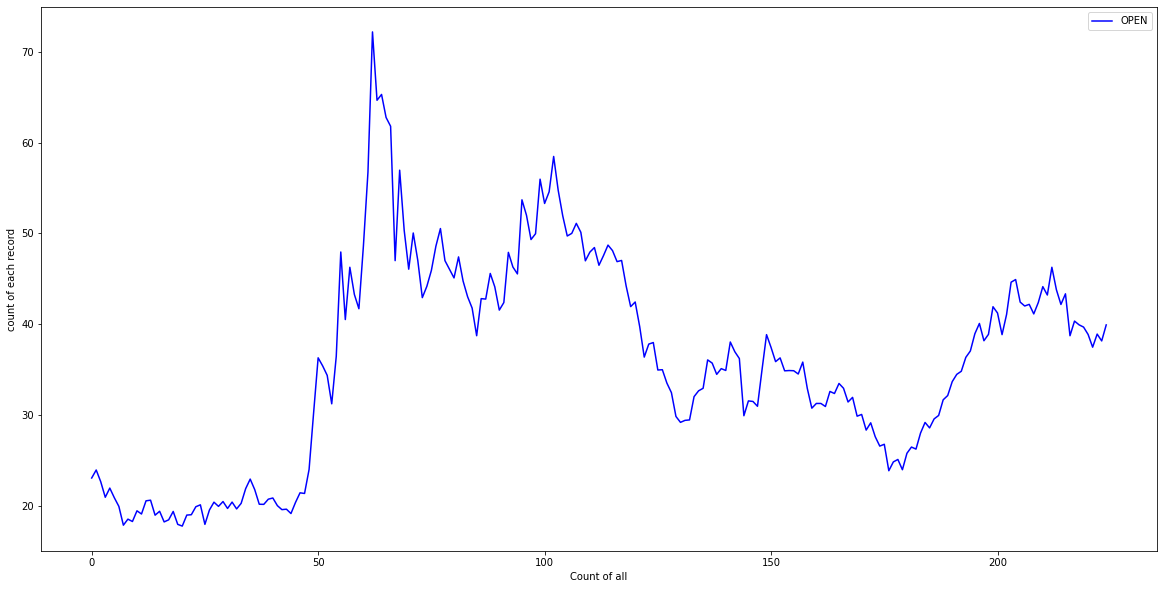

In [15]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Open'].values,color='blue',label='OPEN')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 OPEN values

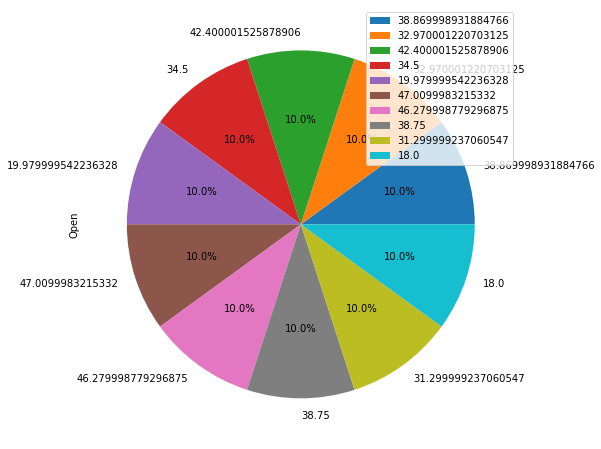

In [16]:
data["Open"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### HIGH price values plot

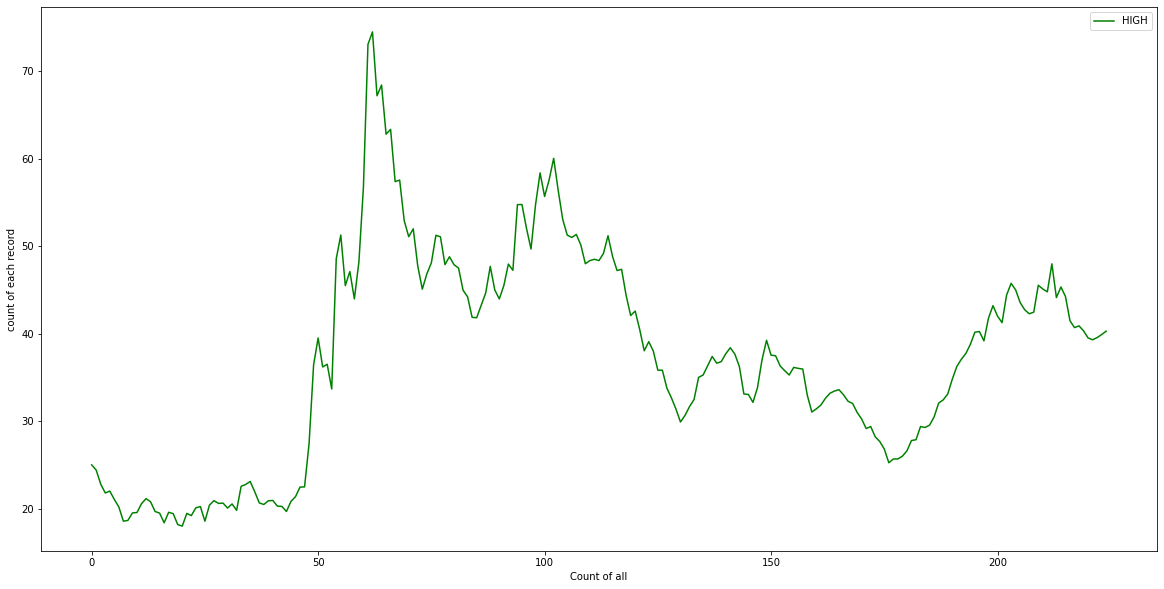

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['High'].values,color='green',label='HIGH')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 HIGH values

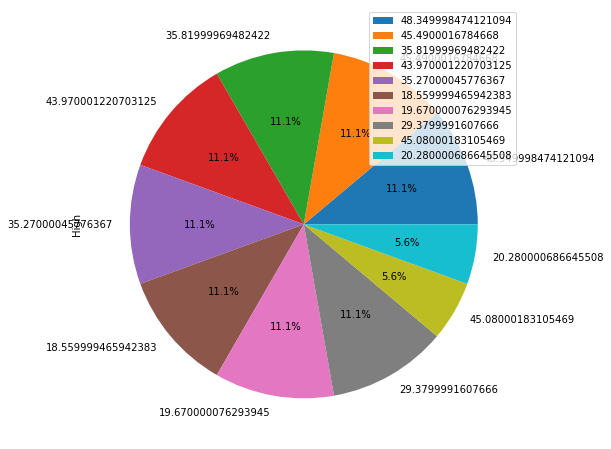

In [18]:
data["High"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### LOW price values plot

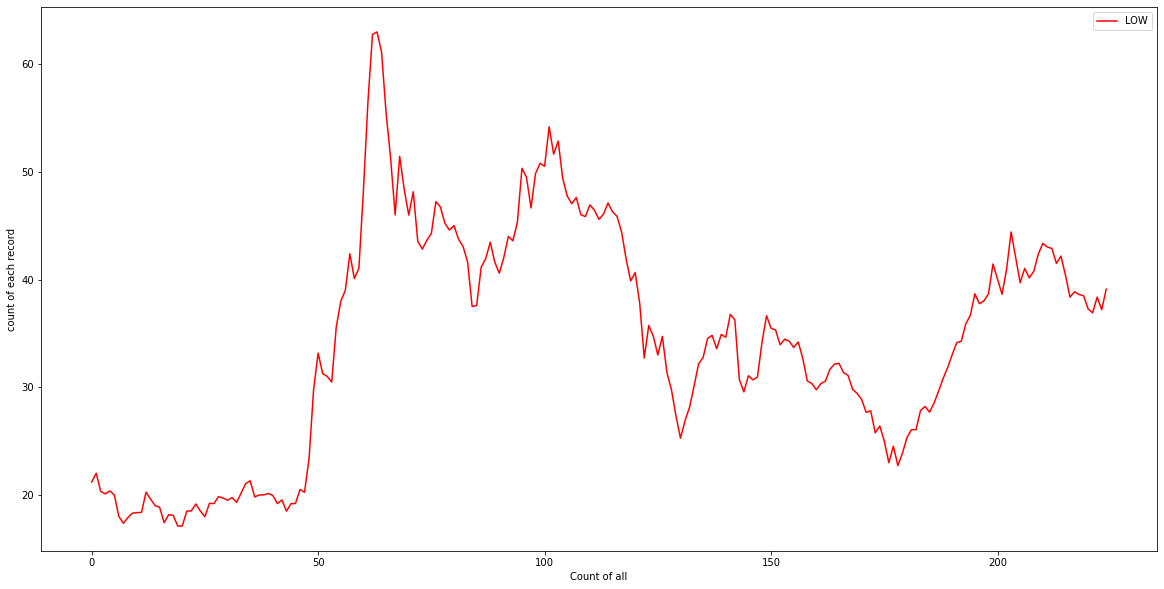

In [19]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Low'].values,color='red',label='LOW')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 LOW values

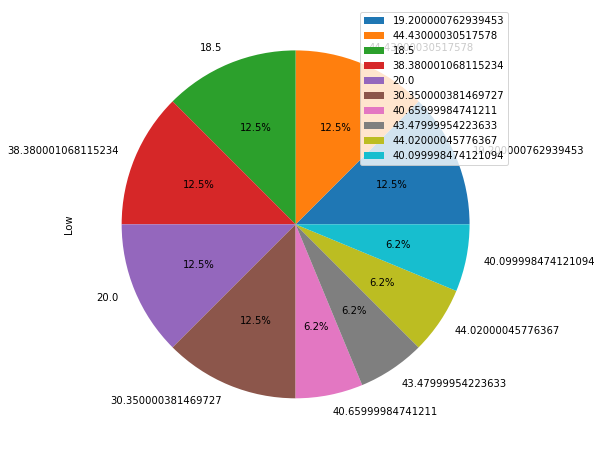

In [20]:
data["Low"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

### CLOSE price values plot

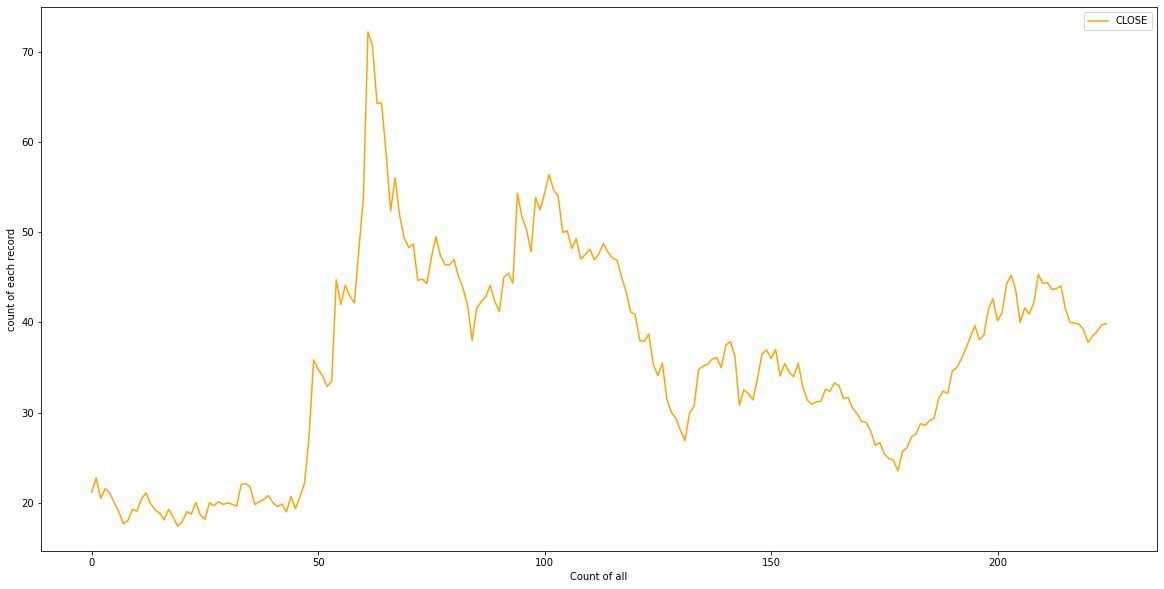

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1,1,1)
plt.plot(data['Close'].values,color='orange',label='CLOSE')

plt.xlabel('Count of all')
plt.ylabel('count of each record')
plt.legend(loc='best')
plt.show()

### Counts Distribution of top 10 CLOSE values

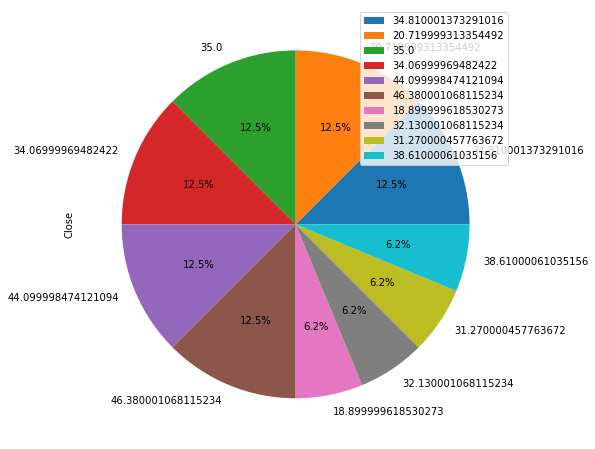

In [22]:
data["Close"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(loc='best')

# ------------------------------------------------------------------------------------------------------

# Data Preparation and Feature Extraction

# ------------------------------------------------------------------------------------------------------

### stochastic features 

In [23]:

from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

def stochastic(df, k, d):
    low_min  = df['Low'].rolling(window=k).min()
    high_max = df['High'].rolling( window=k).max()
    df['stochastic_k'] = 100 * (df['Close'] - low_min)/(high_max - low_min)
    df['stochastic_d'] = df['stochastic_k'].rolling(window=d).mean()
    return df

stochs = stochastic(data, k=14, d=3)
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_k.tail(365), name='K stochastic'))
fig.add_trace(go.Scatter(x=data.index, y=stochs.stochastic_d.tail(365), name='D stochastic'))
fig.show()

### EMA, MACD, MACD single features 

In [24]:

EMA_12 = pd.Series(data['Close'].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(data['Close'].ewm(span=26, min_periods=26).mean())
MACD = pd.Series(EMA_12 - EMA_26)
data['MACD']=pd.Series(EMA_12 - EMA_26)
MACD_signal = pd.Series(MACD.ewm(span=9, min_periods=9).mean())
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_12, name='EMA 12'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=EMA_26, name='EMA 26'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD, name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=MACD_signal, name='Signal line'), row=2, col=1)
fig.show()

<AxesSubplot:xlabel='Date'>

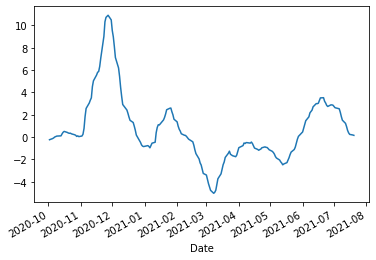

In [25]:
data['MACD'].plot()

### Moving average features

In [26]:
data['EMA_50'] = data['Close'].ewm(50).mean().shift()
data['EMA_200'] =data['Close'].ewm(200).mean().shift()
data['MA_50'] = data['Close'].rolling(50).mean()
data['MA_200'] = data['Close'].rolling(200).mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_50, name='EMA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.EMA_200, name='EMA 200'))
fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data.MA_50, name='MA 50'))
fig.add_trace(go.Scatter(x=data.index, y=data.MA_200, name='MA 200'))

fig.add_trace(go.Scatter(x=data.index, y=data.Close, name='Close', line_color='dimgray', opacity=0.3))
fig.show()

### Relative Strength Index RSI 7 and 14 features

In [28]:
def RSI(df, n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp < 0] = 0
    pricesDown[pricesDown > 0] = 0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp / rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi


data['RSI 7'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 7']))
fig.show()

In [29]:
data['RSI 14'] = RSI(data).fillna(0)
fig = go.Figure(go.Scatter(x=data.index, y=data['RSI 14']))
fig.show()

### Bollinger bands features

In [30]:
def bbands(price, length=30, numsd=2):
    ave = price.rolling(window = length, center = False).mean()
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

data['BB_Middle_Band'], data['BB_Upper_Band'], data['BB_Lower_Band'] = bbands(data['Close'], length=20, numsd=1)

In [31]:
fig = go.Figure(go.Scatter(x=data.index, y=data['BB_Middle_Band']))
fig.show()

### Calculation of Aroon Oscillator features

In [32]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df.index):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [33]:
listofzeros = [0] * 25
up, down = aroon(data)
aroon_list = [x - y for x, y in zip(up,down)]
if len(aroon_list)==0:
    aroon_list = [0] * data.shape[0]
    data['Aroon_Oscillator'] = aroon_list
else:
    data['Aroon_Oscillator'] = listofzeros+aroon_list

In [34]:
fig = go.Figure(go.Scatter(x=data.index, y=data['Aroon_Oscillator']))
fig.show()

### Average Directional Index features

In [35]:
data['ATR'] = data['Close'].rolling(window=14).mean()
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
DMI(data, 14)

In [36]:
fig = go.Figure(go.Scatter(x=data.index, y=data['ADX']))
fig.show()

# Final Data after features extraction and preparation

In [37]:
data=data.replace(np.NaN, 0)
data

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2020-08-27  23.100000  25.000000  21.200001  21.219999  82219700          0   
2020-08-28  23.980000  24.400000  22.020000  22.790001  44847300          0   
2020-08-31  22.690001  22.790001  20.330000  20.500000  20816000          0   
2020-09-01  20.980000  21.790001  20.100000  21.610001  15291400          0   
2020-09-02  21.990000  22.000000  20.379999  21.090000   9090100          0   
...               ...        ...        ...        ...       ...        ...   
2021-07-14  38.889999  39.505001  37.279999  37.770000  11170200          0   
2021-07-15  37.490002  39.299999  36.919998  38.509998  11017100          0   
2021-07-16  38.930000  39.549999  38.380001  39.029999  11302700          0   
2021-07-19  38.180000  39.900002  37.209999  39.720001  10564000          0   
2021-07-20  39.939999  40.279999  39.110001  39.875000   5568558          0   

            Stock Splits  stochastic_k  stochastic_d      MACD  ...  \
Date                                                            ...   
2020-08-27             0      0.000000      0.000000  0.000000  ...   
2020-08-28             0      0.000000      0.000000  0.000000  ...   
2020-08-31             0      0.000000      0.000000  0.000000  ...   
2020-09-01             0      0.000000      0.000000  0.000000  ...   
2020-09-02             0      0.000000      0.000000  0.000000  ...   
...                  ...           ...           ...       ...  ...   
2021-07-14             0      4.579455      9.269527  0.597016  ...   
2021-07-15             0     14.376130      9.131020  0.376892  ...   
2021-07-16             0     19.077761     12.677782  0.241617  ...   
2021-07-19             0     25.316480     19.590124  0.187921  ...   
2021-07-20             0     26.717916     23.704052  0.156075  ...   

            Aroon_Oscillator        ATR    UpMove  DownMove  Zero    PlusDM  \
Date                                                                          
2020-08-27               0.0   0.000000  0.000000  0.000000     0  0.000000   
2020-08-28               0.0   0.000000 -0.600000 -0.820000     0  0.000000   
2020-08-31               0.0   0.000000 -1.609999  1.690001     0  0.000000   
2020-09-01               0.0   0.000000 -1.000000  0.230000     0  0.000000   
2020-09-02               0.0   0.000000  0.209999 -0.279999     0  0.209999   
...                      ...        ...       ...       ...   ...       ...   
2021-07-14              64.0  41.911428 -0.805000  1.230000     0  0.000000   
2021-07-15             -32.0  41.737143 -0.205002  0.360001     0  0.000000   
2021-07-16             -36.0  41.513571  0.250000 -1.460003     0  0.250000   
2021-07-19             -36.0  41.114285  0.350002  1.170002     0  0.000000   
2021-07-20             -36.0  40.796785  0.379997 -1.900002     0  0.379997   

             MinusDM    plusDI   minusDI        ADX  
Date                                                 
2020-08-27  0.000000  0.000000  0.000000   0.000000  
2020-08-28  0.000000  0.000000  0.000000   0.000000  
2020-08-31  1.690001  0.000000  0.000000   0.000000  
2020-09-01  0.230000  0.000000  0.000000   0.000000  
2020-09-02  0.000000  0.000000  0.000000   0.000000  
...              ...       ...       ...        ...  
2021-07-14  1.230000  0.965403  1.591806  19.904223  
2021-07-15  0.360001  0.836683  1.494571  21.013044  
2021-07-16  0.000000  0.805420  1.295295  21.320565  
2021-07-19  1.170002  0.698031  1.502020  23.350373  
2021-07-20  0.000000  0.729152  1.301751  23.996231  

[225 rows x 29 columns]

# -----------------------------------------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling </center></h1>

# -----------------------------------------------------------------------------------------------------------

### Taking input features 

In [38]:
X=data.drop('Close', axis=1)
X

Open       High        Low    Volume  Dividends  \
Date                                                               
2020-08-27  23.100000  25.000000  21.200001  82219700          0   
2020-08-28  23.980000  24.400000  22.020000  44847300          0   
2020-08-31  22.690001  22.790001  20.330000  20816000          0   
2020-09-01  20.980000  21.790001  20.100000  15291400          0   
2020-09-02  21.990000  22.000000  20.379999   9090100          0   
...               ...        ...        ...       ...        ...   
2021-07-14  38.889999  39.505001  37.279999  11170200          0   
2021-07-15  37.490002  39.299999  36.919998  11017100          0   
2021-07-16  38.930000  39.549999  38.380001  11302700          0   
2021-07-19  38.180000  39.900002  37.209999  10564000          0   
2021-07-20  39.939999  40.279999  39.110001   5568558          0   

            Stock Splits  stochastic_k  stochastic_d      MACD     EMA_50  \
Date                                                                        
2020-08-27             0      0.000000      0.000000  0.000000   0.000000   
2020-08-28             0      0.000000      0.000000  0.000000  21.219999   
2020-08-31             0      0.000000      0.000000  0.000000  22.012772   
2020-09-01             0      0.000000      0.000000  0.000000  21.498497   
2020-09-02             0      0.000000      0.000000  0.000000  21.527206   
...                  ...           ...           ...       ...        ...   
2021-07-14             0      4.579455      9.269527  0.597016  37.162367   
2021-07-15             0     14.376130      9.131020  0.376892  37.174433   
2021-07-16             0     19.077761     12.677782  0.241617  37.200947   
2021-07-19             0     25.316480     19.590124  0.187921  37.237250   
2021-07-20             0     26.717916     23.704052  0.156075  37.286515   

            ...  Aroon_Oscillator        ATR    UpMove  DownMove  Zero  \
Date        ...                                                          
2020-08-27  ...               0.0   0.000000  0.000000  0.000000     0   
2020-08-28  ...               0.0   0.000000 -0.600000 -0.820000     0   
2020-08-31  ...               0.0   0.000000 -1.609999  1.690001     0   
2020-09-01  ...               0.0   0.000000 -1.000000  0.230000     0   
2020-09-02  ...               0.0   0.000000  0.209999 -0.279999     0   
...         ...               ...        ...       ...       ...   ...   
2021-07-14  ...              64.0  41.911428 -0.805000  1.230000     0   
2021-07-15  ...             -32.0  41.737143 -0.205002  0.360001     0   
2021-07-16  ...             -36.0  41.513571  0.250000 -1.460003     0   
2021-07-19  ...             -36.0  41.114285  0.350002  1.170002     0   
2021-07-20  ...             -36.0  40.796785  0.379997 -1.900002     0   

              PlusDM   MinusDM    plusDI   minusDI        ADX  
Date                                                           
2020-08-27  0.000000  0.000000  0.000000  0.000000   0.000000  
2020-08-28  0.000000  0.000000  0.000000  0.000000   0.000000  
2020-08-31  0.000000  1.690001  0.000000  0.000000   0.000000  
2020-09-01  0.000000  0.230000  0.000000  0.000000   0.000000  
2020-09-02  0.209999  0.000000  0.000000  0.000000   0.000000  
...              ...       ...       ...       ...        ...  
2021-07-14  0.000000  1.230000  0.965403  1.591806  19.904223  
2021-07-15  0.000000  0.360001  0.836683  1.494571  21.013044  
2021-07-16  0.250000  0.000000  0.805420  1.295295  21.320565  
2021-07-19  0.000000  1.170002  0.698031  1.502020  23.350373  
2021-07-20  0.379997  0.000000  0.729152  1.301751  23.996231  

[225 rows x 28 columns]

### Taking target as output

In [39]:
y=data['Close']
y

Date
2020-08-27    21.219999
2020-08-28    22.790001
2020-08-31    20.500000
2020-09-01    21.610001
2020-09-02    21.090000
                ...    
2021-07-14    37.770000
2021-07-15    38.509998
2021-07-16    39.029999
2021-07-19    39.720001
2021-07-20    39.875000
Name: Close, Length: 225, dtype: float64

### Converting the input features and target into array

In [40]:
X=np.array(X)
y=np.array(y)

### Features Normalization

In [41]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# Spliting Dataset into 70% Training and 30% Testing

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# --------------------------------------------------------------------------------------------------

# Random Forest Model

In [43]:
RF=RandomForestRegressor()
RF= RF.fit(X_train , y_train)
RF

RandomForestRegressor()

# Evaluation Measures on Test data

# R2

In [44]:
y_pred_test = RF.predict(X_test)
rf_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(rf_test_rs,3))

R Squared :  0.986


# MSE

In [45]:
rf_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(rf_test_mse,3))

Mean Squared Error:  1.999


# MAE

In [46]:
rf_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(rf_test_MAE,3))

Mean Absolute Error:  0.929


# Predictions and Actual Stock Price

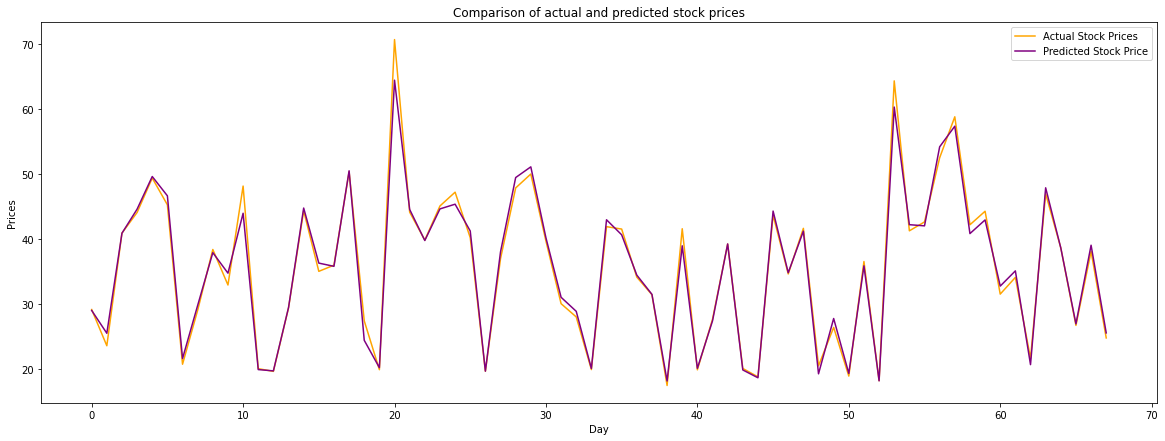

In [47]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='purple',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# XGBoost Model

In [48]:
XGB=XGBRegressor()
XGB= XGB.fit(X_train, y_train)
XGB

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Evaluation Measures on Test data

# R2

In [49]:
y_pred_test = XGB.predict(X_test)
xgb_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(xgb_test_rs,3))

R Squared :  0.988


# MSE

In [50]:
XGB_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(XGB_test_mse,3))

Mean Squared Error:  1.691


# MAE

In [51]:
XGB_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(XGB_test_MAE,3))

Mean Absolute Error:  0.96


# Predictions and Actual Stock Price

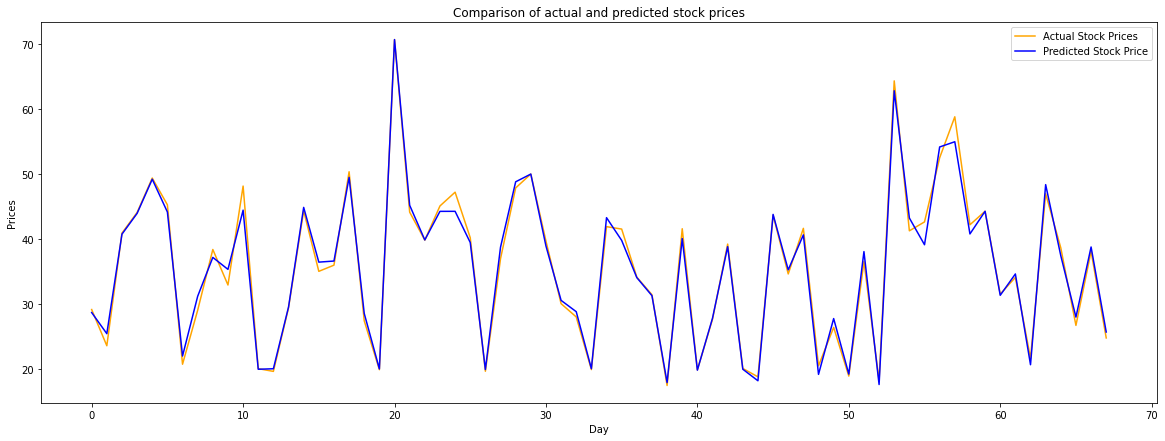

In [52]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='blue',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# --------------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------------

# Ensemble learning Model

In [53]:
RF_1=RandomForestRegressor()
XGB_1=XGBRegressor()

In [54]:
Hyib = VotingRegressor( estimators= [('RF',RF_1),('XGB',XGB_1)])
Hyib= Hyib.fit(X_train , y_train)
Hyib

VotingRegressor(estimators=[('RF', RandomForestRegressor()),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          ra

# Evaluation Measures on Test data

# R2

In [55]:
y_pred_test = Hyib.predict(X_test)
Hyib_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(Hyib_test_rs,3))

R Squared :  0.99


# MSE

In [56]:
Hyib_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(Hyib_test_mse,3))

Mean Squared Error:  1.383


# MAE

In [57]:
Hyib_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(Hyib_test_MAE,3))

Mean Absolute Error:  0.845


# Predictions and Actual Stock Price

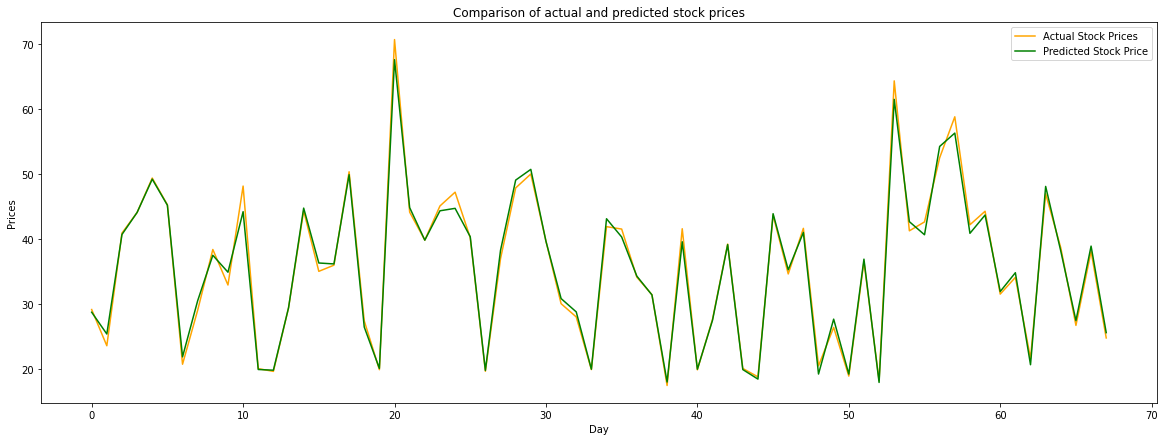

In [58]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='green',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------

# RNN Model

# ------------------------------------------------------------------------------------------------------

In [59]:
def RNN_model():
    RNN = Sequential()
    RNN.add(Dense(64,input_shape=(28,)))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(64))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    RNN.add(Dense(1))
    RNN.add(Dropout(0.2))
    RNN.add(Activation('relu'))
    return RNN
RNN_model=RNN_model()
RNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1856      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

In [60]:
RNN_model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')
RNN_model.fit(X_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
1/1 [==============================] - 0s 1000us/step - loss: 1400.3990
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 1369.2733
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1329.3210
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1261.9922
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 1187.6554
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1117.4766
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 954.9875
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 900.5758
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 697.7894
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 655.5096
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 491.3462
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 467.6308
Epoch 13/100
1/1 [==========

### R2

In [61]:
y_pred_test = RNN_model.predict(X_test)
RNN_test_rs=r2_score(y_test,y_pred_test)
print('R Squared : ', round(RNN_test_rs,3))

R Squared :  0.481


### MSE

In [62]:
RNN_test_mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared Error: ', round(RNN_test_mse,3))

Mean Squared Error:  71.527


### MAE

In [63]:
RNN_test_MAE=mean_absolute_error(y_test,y_pred_test)
print('Mean Absolute Error: ', round(RNN_test_MAE,3))

Mean Absolute Error:  7.569


# Predictions and Actual Stock Price

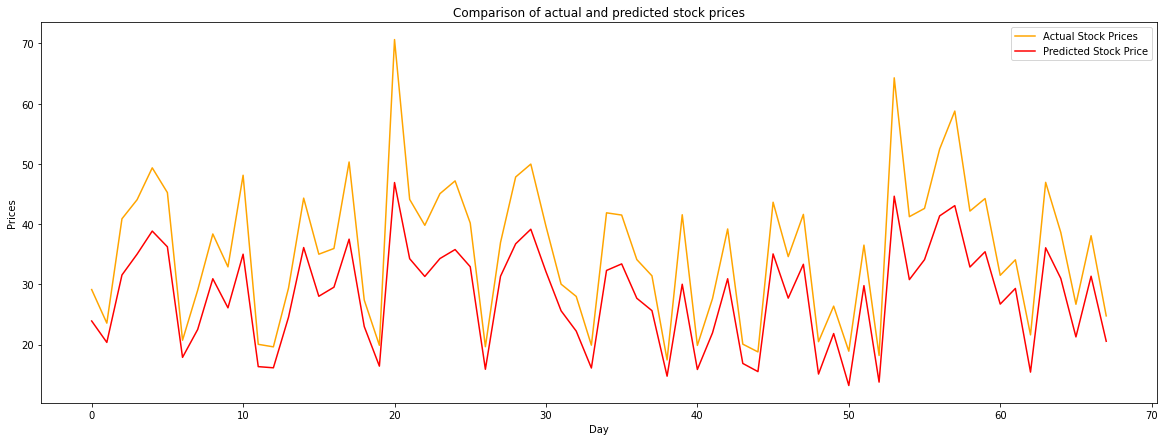

In [64]:
a=pd.DataFrame()
a['Actual Stock Price']=y_test
a['Predicted Stock Price']=y_pred_test
plt.figure(figsize=(20, 7))
plt.subplot(1,1,1)
plt.plot(a['Actual Stock Price'].values,color='orange',label='Actual Stock Prices')
plt.plot(a['Predicted Stock Price'].values,color='red',label='Predicted Stock Price')
plt.title('Comparison of actual and predicted stock prices')
plt.xlabel('Day')
plt.ylabel('Prices')
plt.legend()
plt.show()

# ------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results on R2 score

In [65]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "R2 Score"]


x.add_row(["Random Forest Algorithm", round(rf_test_rs,3)])
x.add_row(["XGB Algorithm",  round(xgb_test_rs,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_rs,3)])
x.add_row(["Neural Network Model", round(RNN_test_rs,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+----------+
|            Model            | R2 Score |
+-----------------------------+----------+
|   Random Forest Algorithm   |  0.986   |
|        XGB Algorithm        |  0.988   |
| Ensemble Learning Algorithm |   0.99   |
|     Neural Network Model    |  0.481   |
+-----------------------------+----------+




# Comparison of all algorithms Results on MSE score

In [66]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MSE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_mse,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_mse,3)])
x.add_row(["Ensemble Learning Algorithm",  round(Hyib_test_mse,3)])
x.add_row(["Neural Network Model", round(RNN_test_mse,3)])


print(x)
print('\n')



Comparison of all algorithms
+-----------------------------+-----------+
|            Model            | MSE score |
+-----------------------------+-----------+
|   Random Forest Algorithm   |   1.999   |
|        XGB Algorithm        |   1.691   |
| Ensemble Learning Algorithm |   1.383   |
|     Neural Network Model    |   71.527  |
+-----------------------------+-----------+




# Comparison of all algorithms Results on MAE score

In [67]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms")
x.field_names = ["Model", "MAE score"]


x.add_row(["Random Forest Algorithm", round(rf_test_MAE,3)])
x.add_row(["XGB Algorithm",  round(XGB_test_MAE,3)])
x.add_row(["Ensemble Learning Model",  round(Hyib_test_MAE,3)])
x.add_row(["Neural Network Model", round(RNN_test_MAE,3)])

print(x)
print('\n')



Comparison of all algorithms
+-------------------------+-----------+
|          Model          | MAE score |
+-------------------------+-----------+
| Random Forest Algorithm |   0.929   |
|      XGB Algorithm      |    0.96   |
| Ensemble Learning Model |   0.845   |
|   Neural Network Model  |   7.569   |
+-------------------------+-----------+




# Graph of MSE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

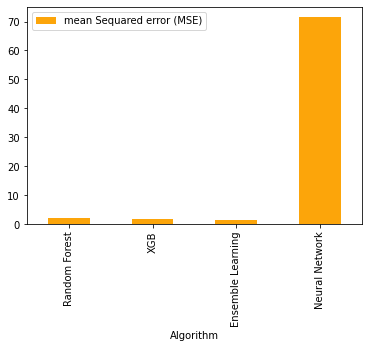

In [68]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'mean Sequared error (MSE)': [rf_test_mse]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean Sequared error (MSE)': [XGB_test_mse]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean Sequared error (MSE)': [Hyib_test_mse]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean Sequared error (MSE)': [RNN_test_mse]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(.2, .4, 6))
Result_Comp.plot(kind='bar',figsize=(6, 4),stacked=True, color=color, legend=True)

# Graph of R2 of each algorithm

<AxesSubplot:xlabel='Algorithm'>

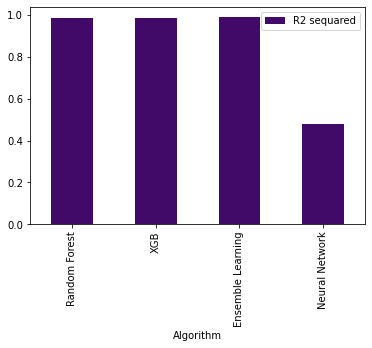

In [69]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'], 'R2 sequared': [rf_test_rs]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'R2 sequared': [xgb_test_rs]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'R2 sequared': [Hyib_test_rs]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'R2 sequared': [RNN_test_rs]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.8, 0.5, 2))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)

# Graph of MAE of each algorithm

<AxesSubplot:xlabel='Algorithm'>

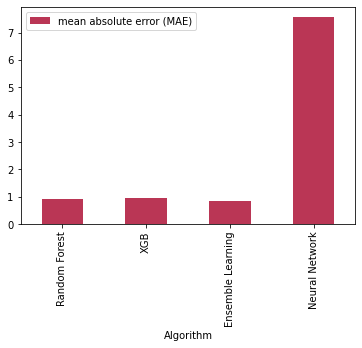

In [70]:
Result_Comp = pd.DataFrame({'Algorithm':['Random Forest'],'mean absolute error (MAE)': [rf_test_MAE]})
Result_Comp1 = pd.DataFrame({'Algorithm':['XGB'], 'mean absolute error (MAE)': [XGB_test_MAE]})
Result_Comp2 = pd.DataFrame({'Algorithm':['Ensemble Learning'], 'mean absolute error (MAE)': [Hyib_test_MAE]})
Result_Comp3 = pd.DataFrame({'Algorithm':['Neural Network'], 'mean absolute error (MAE)': [RNN_test_MAE]})

Result_Comp = pd.concat([Result_Comp, Result_Comp1,Result_Comp2,Result_Comp3])
Result_Comp.set_index("Algorithm",drop=True,inplace=True)
color = cm.inferno_r(np.linspace(0.5, 0.2, 7))
Result_Comp.plot(kind='bar', figsize=(6, 4),color=color)